In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
from featurewiz import featurewiz

Imported featurewiz: advanced feature engg and selection library. Version=0.0.42
output = featurewiz(dataname, target, corr_limit=0.70,
                    verbose=2, sep=',', header=0, test_data='',
                    feature_engg='', category_encoders='')
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                


In [3]:
df=pd.read_csv("C:/Users/Admin/Downloads/Dataset.csv")

In [4]:
df.head()

,Timestamp,Lime_kiln_production_t/d,Mud_flow_to_Filter_m3/h,Density_mud_to_kiln_kg/m3,Feed_zone_temperature_C,ESP_inlet_temperature_C,Calcination_zone_temperature_C,LMD_feed_mud_temperature _C,LMD_kiln_feed_temperature_C,Esp_outlet_temperature_C,...,IDF_bearing_temperature2_C,GN_to_kiln_nm3/h,Flow _nm3/h,O2_%,ESP_outlet_pressure_Pa,ESP_Diff_Pressure_pa,ESP_inlet_pressure_kPa,Burning_zone_pressure_Pa(G),Primary_air_pressure_Pa(G),GN_pressure_kPa(G)
0,24-08-16 00:00:00,798.667747,159.896639,1205.021608,502.068863,269.685021,746.318993,590.641734,415.707263,263.412758,...,44.113005,5042.171196,2396.877217,6.481069,-5029.683594,-2000,-4.927068,-34.905747,2883.768439,452.641449
1,24-08-16 00:30:00,798.449686,159.914889,1204.840400,501.889027,266.796239,737.006654,590.520355,415.753664,260.127347,...,43.924524,5025.550039,2306.910774,6.279912,-5029.683594,-2000,-4.939969,-35.112042,2868.067631,452.641449
2,24-08-16 01:00:00,798.231625,160.083309,1204.945270,502.103374,267.337429,718.110868,591.612307,414.413146,260.303590,...,43.736043,5008.928881,2450.513819,6.196669,-5029.683594,-2000,-4.952870,-35.883055,2923.644826,452.641449
3,24-08-16 01:30:00,798.013564,159.875902,1205.185474,502.358130,267.587721,724.973224,592.601287,413.454411,260.904727,...,43.547561,4993.424376,2611.431780,5.900719,-5029.683594,-2000,-4.965772,-34.664986,2908.512170,452.641449
4,24-08-16 02:00:00,797.795503,159.968484,1205.413424,502.612885,271.760741,737.208821,595.493488,411.233942,263.358234,...,43.359080,4989.879237,2559.687420,4.999143,-5029.683594,-2000,-4.974704,-33.810043,2903.507123,452.641449


In [5]:
df.shape

(2481, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2481 entries, 0 to 2480
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Timestamp                       2481 non-null   object 
 1   Lime_kiln_production_t/d        2481 non-null   float64
 2   Mud_flow_to_Filter_m3/h         2481 non-null   float64
 3   Density_mud_to_kiln_kg/m3       2481 non-null   float64
 4   Feed_zone_temperature_C         2481 non-null   float64
 5   ESP_inlet_temperature_C         2481 non-null   float64
 6   Calcination_zone_temperature_C  2481 non-null   float64
 7   LMD_feed_mud_temperature _C     2481 non-null   float64
 8   LMD_kiln_feed_temperature_C     2481 non-null   float64
 9   Esp_outlet_temperature_C        2481 non-null   float64
 10  Kiln_flame_temperature_C        2481 non-null   float64
 11  Bearing_fan_temperature_C       2481 non-null   float64
 12  Primary_air_temperature_C       24

In [7]:
df.isna().sum()

Timestamp                         0
Lime_kiln_production_t/d          0
Mud_flow_to_Filter_m3/h           0
Density_mud_to_kiln_kg/m3         0
Feed_zone_temperature_C           0
ESP_inlet_temperature_C           0
Calcination_zone_temperature_C    0
LMD_feed_mud_temperature _C       0
LMD_kiln_feed_temperature_C       0
Esp_outlet_temperature_C          0
Kiln_flame_temperature_C          0
Bearing_fan_temperature_C         0
Primary_air_temperature_C         0
IDF_bearing_temperature_C         0
IDF_bearing_temperature2_C        0
GN_to_kiln_nm3/h                  0
Flow _nm3/h                       0
O2_%                              0
ESP_outlet_pressure_Pa            0
ESP_Diff_Pressure_pa              0
ESP_inlet_pressure_kPa            0
Burning_zone_pressure_Pa(G)       0
Primary_air_pressure_Pa(G)        0
GN_pressure_kPa(G)                0
dtype: int64

In [8]:
df.describe()

,Lime_kiln_production_t/d,Mud_flow_to_Filter_m3/h,Density_mud_to_kiln_kg/m3,Feed_zone_temperature_C,ESP_inlet_temperature_C,Calcination_zone_temperature_C,LMD_feed_mud_temperature _C,LMD_kiln_feed_temperature_C,Esp_outlet_temperature_C,Kiln_flame_temperature_C,...,IDF_bearing_temperature2_C,GN_to_kiln_nm3/h,Flow _nm3/h,O2_%,ESP_outlet_pressure_Pa,ESP_Diff_Pressure_pa,ESP_inlet_pressure_kPa,Burning_zone_pressure_Pa(G),Primary_air_pressure_Pa(G),GN_pressure_kPa(G)
count,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,...,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2481.0,2481.000000,2481.000000,2481.000000,2481.000000
mean,763.698384,153.042463,1203.919253,526.602223,261.258759,737.449953,610.153335,517.442464,254.807284,732.127956,...,52.228119,4843.320170,1923.536289,5.907778,-4989.178443,-2000.0,-4.930894,-35.526869,2765.949968,450.521325
std,85.071428,15.657971,13.745480,42.598556,19.982922,43.478139,34.197208,53.376273,17.518384,42.985806,...,4.564801,491.757432,539.138060,1.738618,421.202822,0.0,0.462863,3.591255,156.419350,5.111619
min,0.003006,0.292285,1000.936325,186.421780,215.937545,227.127009,258.748224,173.917882,213.709003,686.068507,...,33.970470,68.317656,-67.709786,2.993772,-5078.791016,-2000.0,-5.138164,-44.773266,284.218750,446.960799
25%,767.579789,154.416023,1204.650117,496.668270,248.390971,716.873717,586.292801,482.204186,243.207780,692.117129,...,49.506543,4775.271049,1620.438241,5.116294,-5069.626953,-2000.0,-5.075025,-37.777696,2724.065353,449.125671
50%,786.182044,157.011516,1205.123545,526.660946,257.081758,738.964244,608.751622,523.622775,251.119236,717.768969,...,52.132231,4930.009813,1926.279847,5.470593,-5044.923828,-2000.0,-5.039853,-35.712784,2761.961021,449.887454
75%,795.772667,159.617170,1205.569823,556.190620,270.784311,760.979694,633.151591,552.220261,264.177947,768.063296,...,54.814288,5061.548752,2274.441845,6.000594,-5032.273438,-2000.0,-4.972461,-33.563178,2806.105251,450.645172
max,812.766609,161.178032,1222.878858,622.865814,353.269039,852.573100,697.883685,675.710935,331.243128,849.022345,...,70.812299,5481.654257,3648.082098,20.102736,36.868881,-2000.0,-0.120815,-8.758041,3504.999859,585.969753


In [9]:
df.reset_index(drop = True,inplace = True)

Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
Shape of your Data Set loaded: (2481, 24)
Loading test data...
    Filename is an empty string or file not able to be loaded
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    23 Predictors classified...
        2 variable(s) will be ignored since they are ID or low-information variables
No GPU active on this device
    Running XGBoost using CPU parameters
Removing 2 columns from further processing since ID or low information variables
    columns removed: ['ESP_Diff_Pressure_pa', 'Timestamp']
    After removing redundant variables from further processing, features left = 21
#### Single_Label Regression Feature Selection Started ####
Searching for highly correlated variables from 21 variables using SULOV method
#####  SULOV : Searching for Uncorrelated List Of Var

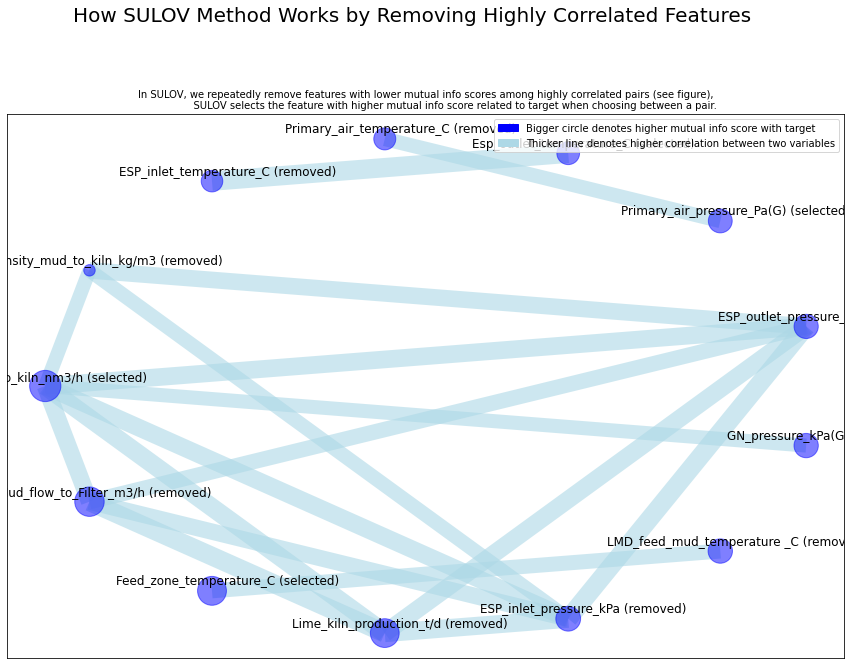

    Adding 0 categorical variables to reduced numeric variables  of 12
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 12 
    Finding Important Features using Boosted Trees algorithm...
        using 12 variables...
        using 10 variables...
        using 8 variables...
        using 6 variables...
        using 4 variables...
        using 2 variables...
Selected 11 important features from your dataset
    Time taken (in seconds) = 7
Returning list of 11 important features and dataframe.


In [10]:
target="O2_%"
features, train = featurewiz(df, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [11]:
high_co=df[['Lime_kiln_production_t/d', 'Mud_flow_to_Filter_m3/h', 'Density_mud_to_kiln_kg/m3', 'ESP_inlet_temperature_C', 'LMD_feed_mud_temperature _C', 'Primary_air_temperature_C', 'ESP_outlet_pressure_Pa', 'ESP_inlet_pressure_kPa', 'GN_pressure_kPa(G)','O2_%']]

In [12]:
high_co.corr()['O2_%']

Lime_kiln_production_t/d      -0.805917
Mud_flow_to_Filter_m3/h       -0.761261
Density_mud_to_kiln_kg/m3     -0.575859
ESP_inlet_temperature_C        0.466030
LMD_feed_mud_temperature _C   -0.044770
Primary_air_temperature_C     -0.130635
ESP_outlet_pressure_Pa         0.747377
ESP_inlet_pressure_kPa         0.773741
GN_pressure_kPa(G)             0.579537
O2_%                           1.000000
Name: O2_%, dtype: float64

In [27]:
high_co.drop(['LMD_feed_mud_temperature _C','Primary_air_temperature_C'],axis=1,inplace=True)

In [28]:
high_co

,Lime_kiln_production_t/d,Mud_flow_to_Filter_m3/h,Density_mud_to_kiln_kg/m3,ESP_inlet_temperature_C,ESP_outlet_pressure_Pa,ESP_inlet_pressure_kPa,GN_pressure_kPa(G)
0,798.667747,159.896639,1205.021608,269.685021,-5029.683594,-4.927068,452.641449
1,798.449686,159.914889,1204.840400,266.796239,-5029.683594,-4.939969,452.641449
2,798.231625,160.083309,1204.945270,267.337429,-5029.683594,-4.952870,452.641449
3,798.013564,159.875902,1205.185474,267.587721,-5029.683594,-4.965772,452.641449
4,797.795503,159.968484,1205.413424,271.760741,-5029.683594,-4.974704,452.641449
...,...,...,...,...,...,...,...
2476,805.179340,158.839048,1205.865704,250.199807,-5052.992188,-5.033316,447.823273
2477,802.488867,158.792972,1205.623589,249.908110,-5052.992188,-5.034819,447.823273
2478,799.798393,158.471010,1205.102027,250.391824,-5052.992188,-5.036322,447.823273
2479,797.107920,158.044266,1205.179526,249.169585,-5052.992188,-5.037825,447.823273


In [29]:
train.corr()['O2_%'].sort_values()

GN_to_kiln_nm3/h                 -0.803823
Calcination_zone_temperature_C   -0.489047
IDF_bearing_temperature2_C       -0.326053
IDF_bearing_temperature_C        -0.210970
Burning_zone_pressure_Pa(G)       0.292372
Esp_outlet_temperature_C          0.372914
O2_%                              1.000000
Name: O2_%, dtype: float64

In [16]:
print(features)

['GN_to_kiln_nm3/h', 'Burning_zone_pressure_Pa(G)', 'Primary_air_pressure_Pa(G)', 'Flow _nm3/h', 'Feed_zone_temperature_C', 'IDF_bearing_temperature_C', 'Bearing_fan_temperature_C', 'Calcination_zone_temperature_C', 'IDF_bearing_temperature2_C', 'Esp_outlet_temperature_C', 'Kiln_flame_temperature_C']


In [17]:
train.drop(["Primary_air_pressure_Pa(G)","Bearing_fan_temperature_C","Flow _nm3/h","Kiln_flame_temperature_C","Feed_zone_temperature_C"],axis=1,inplace=True)

In [18]:
train.corr()["O2_%"].sort_values()

GN_to_kiln_nm3/h                 -0.803823
Calcination_zone_temperature_C   -0.489047
IDF_bearing_temperature2_C       -0.326053
IDF_bearing_temperature_C        -0.210970
Burning_zone_pressure_Pa(G)       0.292372
Esp_outlet_temperature_C          0.372914
O2_%                              1.000000
Name: O2_%, dtype: float64

In [30]:
result=pd.concat([high_co,train],axis=1).reindex(high_co.index)

In [31]:
result

,Lime_kiln_production_t/d,Mud_flow_to_Filter_m3/h,Density_mud_to_kiln_kg/m3,ESP_inlet_temperature_C,ESP_outlet_pressure_Pa,ESP_inlet_pressure_kPa,GN_pressure_kPa(G),GN_to_kiln_nm3/h,Burning_zone_pressure_Pa(G),IDF_bearing_temperature_C,Calcination_zone_temperature_C,IDF_bearing_temperature2_C,Esp_outlet_temperature_C,O2_%
0,798.667747,159.896639,1205.021608,269.685021,-5029.683594,-4.927068,452.641449,5042.171196,-34.905747,48.849698,746.318993,44.113005,263.412758,6.481069
1,798.449686,159.914889,1204.840400,266.796239,-5029.683594,-4.939969,452.641449,5025.550039,-35.112042,49.538594,737.006654,43.924524,260.127347,6.279912
2,798.231625,160.083309,1204.945270,267.337429,-5029.683594,-4.952870,452.641449,5008.928881,-35.883055,50.227490,718.110868,43.736043,260.303590,6.196669
3,798.013564,159.875902,1205.185474,267.587721,-5029.683594,-4.965772,452.641449,4993.424376,-34.664986,50.916387,724.973224,43.547561,260.904727,5.900719
4,797.795503,159.968484,1205.413424,271.760741,-5029.683594,-4.974704,452.641449,4989.879237,-33.810043,51.605283,737.208821,43.359080,263.358234,4.999143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476,805.179340,158.839048,1205.865704,250.199807,-5052.992188,-5.033316,447.823273,5037.826172,-38.486442,57.391629,800.164240,53.839421,247.090915,5.899122
2477,802.488867,158.792972,1205.623589,249.908110,-5052.992188,-5.034819,447.823273,5037.826172,-39.281534,57.592752,793.000562,53.647787,246.396957,6.028506
2478,799.798393,158.471010,1205.102027,250.391824,-5052.992188,-5.036322,447.823273,5037.826172,-38.877864,57.476724,767.159511,53.456154,245.702999,6.100906
2479,797.107920,158.044266,1205.179526,249.169585,-5052.992188,-5.037825,447.823273,5037.826172,-40.392731,57.284473,755.507199,53.264521,245.009041,6.002256


In [32]:
result.corr()['O2_%'].sort_values()

Lime_kiln_production_t/d         -0.805917
GN_to_kiln_nm3/h                 -0.803823
Mud_flow_to_Filter_m3/h          -0.761261
Density_mud_to_kiln_kg/m3        -0.575859
Calcination_zone_temperature_C   -0.489047
IDF_bearing_temperature2_C       -0.326053
IDF_bearing_temperature_C        -0.210970
Burning_zone_pressure_Pa(G)       0.292372
Esp_outlet_temperature_C          0.372914
ESP_inlet_temperature_C           0.466030
GN_pressure_kPa(G)                0.579537
ESP_outlet_pressure_Pa            0.747377
ESP_inlet_pressure_kPa            0.773741
O2_%                              1.000000
Name: O2_%, dtype: float64

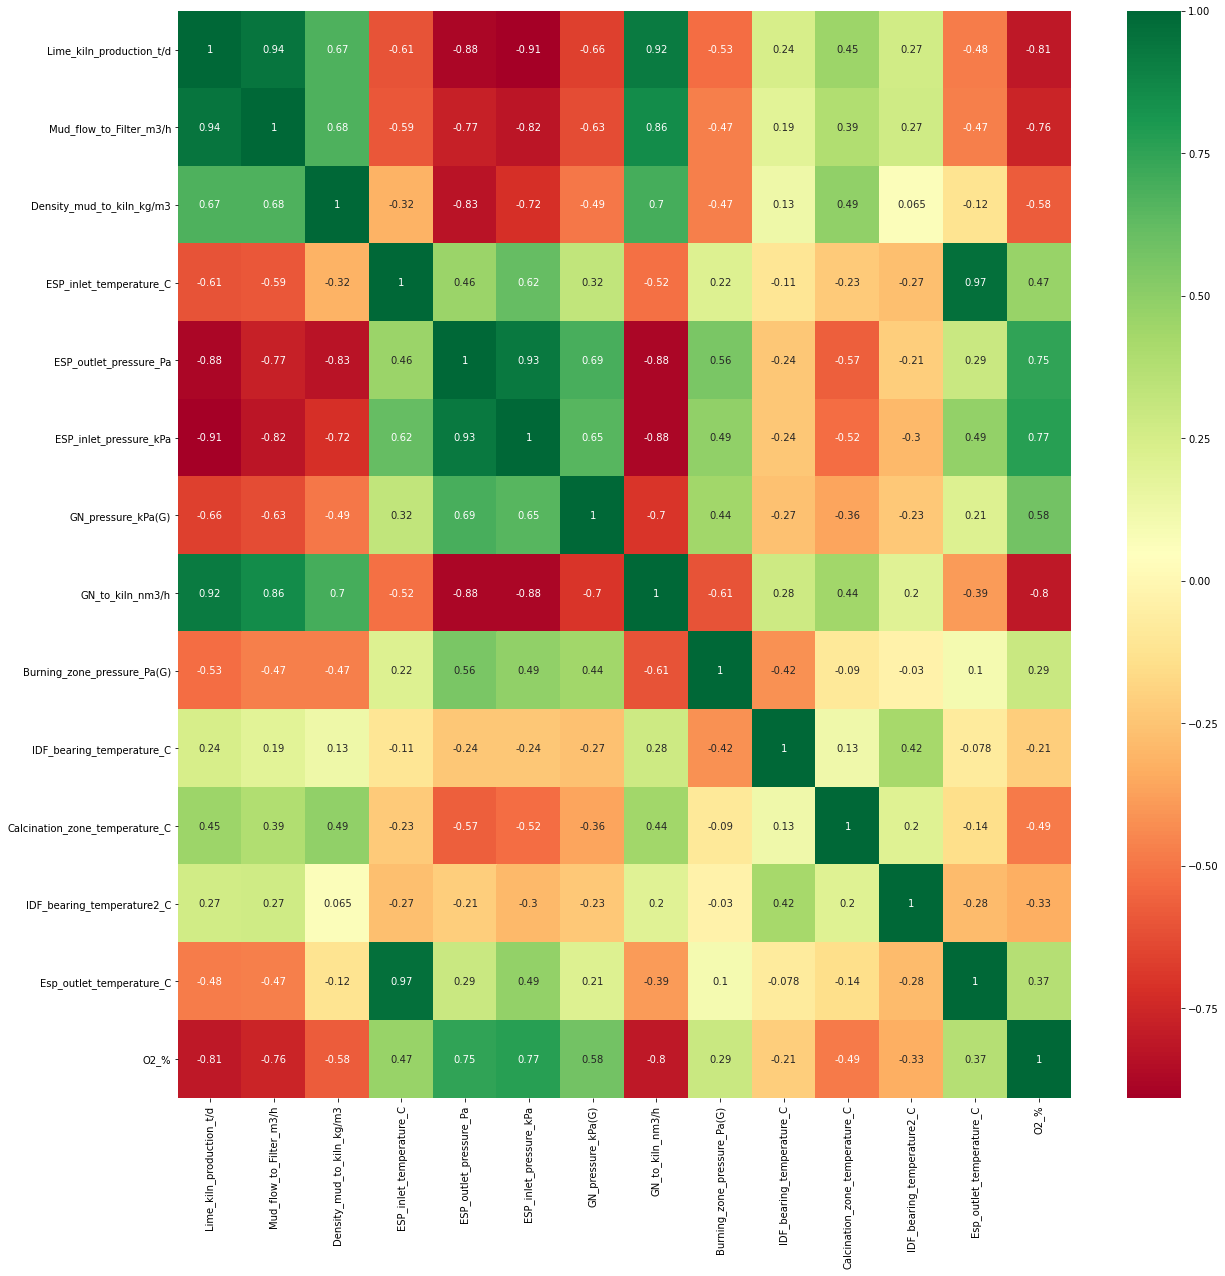

In [34]:
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(result.corr(),annot=True,cmap="RdYlGn")

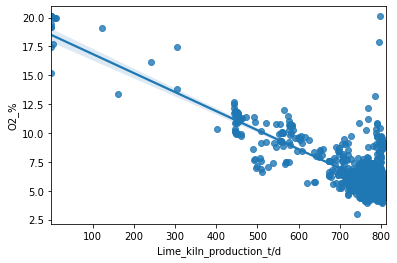

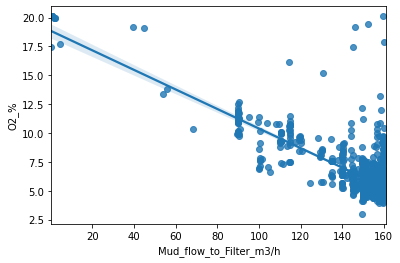

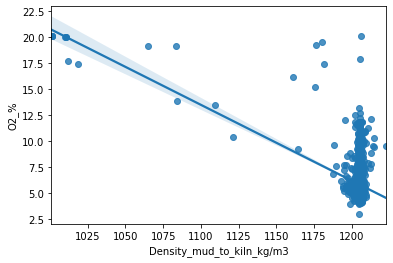

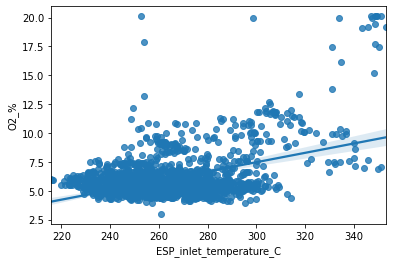

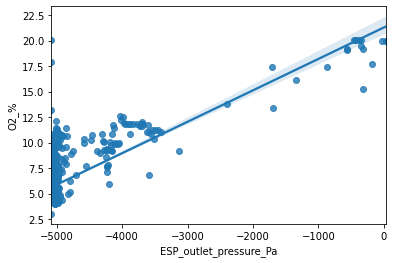

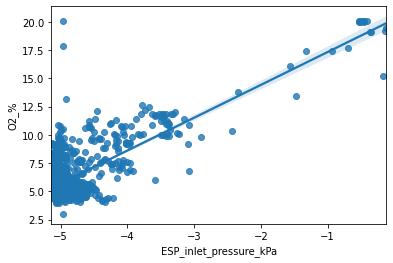

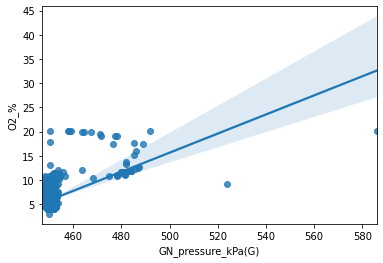

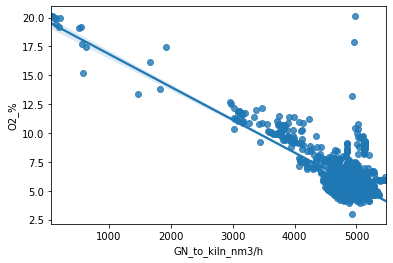

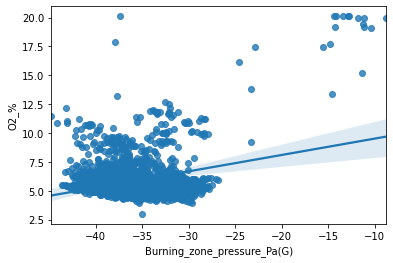

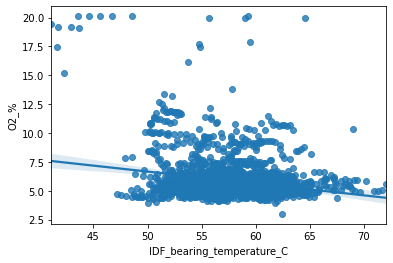

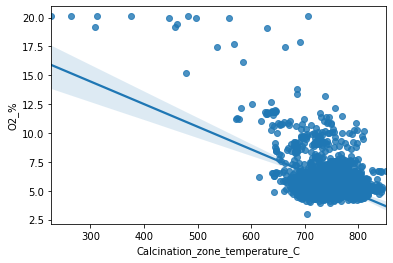

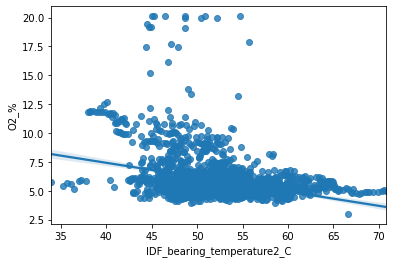

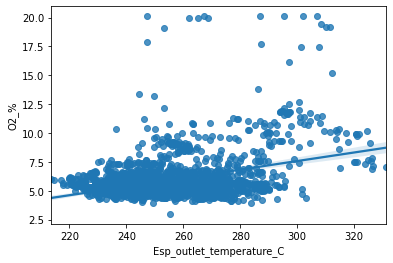

In [45]:
for i in range(0,len(result.columns)-1):
    sns.regplot(x=result.columns[i],y="O2_%",data=result)
    plt.show()
    

In [ ]:
Conclusion: 
The number of features was filtered down to 13 with target variable as "O2_% "
Out of these 9 variables ['Lime_kiln_production_t/d', 'Mud_flow_to_Filter_m3/h', 'Density_mud_to_kiln_kg/m3', 'ESP_inlet_temperature_C', 'LMD_feed_mud_temperature _C', 'Primary_air_temperature_C', 'ESP_outlet_pressure_Pa', 'ESP_inlet_pressure_kPa', 'GN_pressure_kPa(G)'] are found to have the most impact on the target variable.

Out of these variables 'Mud_flow_to_Filter_m3/h' and 'Density_mud_to_kiln_kg/m3' are found to have the most variance associated with them compared to others, which can be reduced by using standard scaler function during model development.